## INTRODUCTION 


This data was downloaded from kaggel. It contains student test scores on 3 subjects namely math, writing and reading. It also contains certain factors such as gender, race/ethnicity, parental level of education,lunch (whether the students had a standard or free lunch meal) and test preparation course(whether the students took the preparation course). These factors will be tested to show their effect on the overall student performance in math, writing and reading.

## PROBLEM STATEMENT 
What are the factors influencing student performance in math, writing and reading.

### Questions to ask 
1. Does taking a test prepartion course affect the outcome of students results?
2. Does race influence performance of students? 
3. Does gender(male/female) contribute to student performance?
4. Does parental education level affect student performance?
5. Is there a correlation between passing a maths test and passing a writing and reading test?

## EXPLORATORY DATA ANALYSIS

### Data Assessment 

#### Importing libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading and checking the data

In [2]:
#loading datasets
data=pd.read_csv("student_performance.csv")

#### Making a copy of the data

In [3]:
dta = data.copy()

####  Checking if the data is ready.  
The first  and last 5 rows was displayed to check if the data has been loaded succesfully 

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
data.shape

(1000, 8)

The data contains 1000 rows and 8 columns

In [7]:
data.columns  ##checking for the individual columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
data.isna().sum()  ##checking for empty cells

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
data[data.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


no duplicates were found in the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Data Cleaning

In [11]:
data.rename(columns = {'race/ethnicity':'race'}, inplace = True)

In [12]:
data.columns = data.columns.str.replace(' ','_')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race                         1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
cols = ['gender', 'race', 'lunch', 'test_preparation_course',]
data[cols] = data[cols].astype('category')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race                         1000 non-null   category
 2   parental_level_of_education  1000 non-null   object  
 3   lunch                        1000 non-null   category
 4   test_preparation_course      1000 non-null   category
 5   math_score                   1000 non-null   int64   
 6   reading_score                1000 non-null   int64   
 7   writing_score                1000 non-null   int64   
dtypes: category(4), int64(3), object(1)
memory usage: 35.9+ KB


In [16]:
data.describe(include = 'number')

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
data.describe(include = 'object')

,parental_level_of_education
count,1000
unique,6
top,some college
freq,226


In [18]:
data.describe(include = 'category')

,gender,race,lunch,test_preparation_course
count,1000,1000,1000,1000
unique,2,5,2,2
top,female,group C,standard,none
freq,518,319,645,642


In [19]:
for i in range(4):
    print(data.columns[i])
    print(data[data.columns[i]].value_counts())

gender
female    518
male      482
Name: gender, dtype: int64
race
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64
lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64


In [20]:
data['total_percentage'] = 100 * (data['math_score'] + data['reading_score'] + data['writing_score'])/300
data[['math_score', 'reading_score', 'writing_score', 'total_percentage']].round().head(10)

,math_score,reading_score,writing_score,total_percentage
0,72,72,74,73.0
1,69,90,88,82.0
2,90,95,93,93.0
3,47,57,44,49.0
4,76,78,75,76.0
5,71,83,78,77.0
6,88,95,92,92.0
7,40,43,39,41.0
8,64,64,67,65.0
9,38,60,50,49.0


Data Cleaning summary
- Ethnicity/race columm was renamed race
- Whitespace were replaced with underscore for easy reading
- The datatype of gender, race, lunch and test preparation score was changed from object to category.
- A new column was added for total percentage for each student for the 3 test scores

#### Data Analysis and visualization

Getting the means of math, reading and writing score

In [21]:
math_mean = data['math_score'].mean()
reading_mean = data['reading_score'].mean()
writing_mean = data['writing_score'].mean()

print(f'Average score in Math : { math_mean }\nAverage score in Reading : { reading_mean }\nAverage score in Writing : { writing_mean }\n')


Average score in Math : 66.089
Average score in Reading : 69.169
Average score in Writing : 68.054



Checking for the distribution on the scores

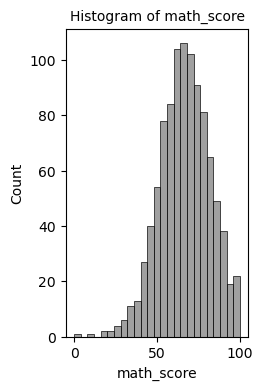

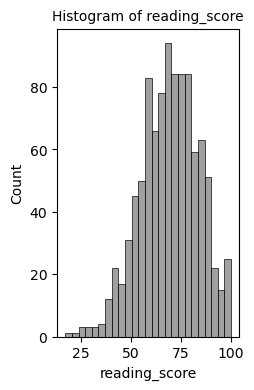

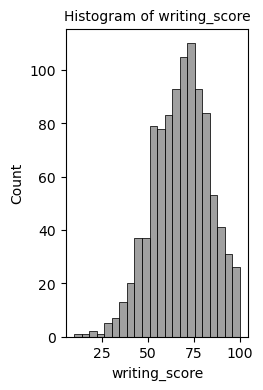

In [22]:
test_scores = data[['math_score','reading_score','writing_score']]
for i,col in enumerate(test_scores):
    plt.figure(figsize=(8,4))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data = data,x=col,stat='count',bins=bins,color='gray')
    plt.title(f'Histogram of {col}',size=10)

The scores for math, reading and writing are evenly distributed. Majority of the students scored between 50 and 80 for all 3 test which is great when we compare the means of the individual test scores 

##### Test preparation course and student scores

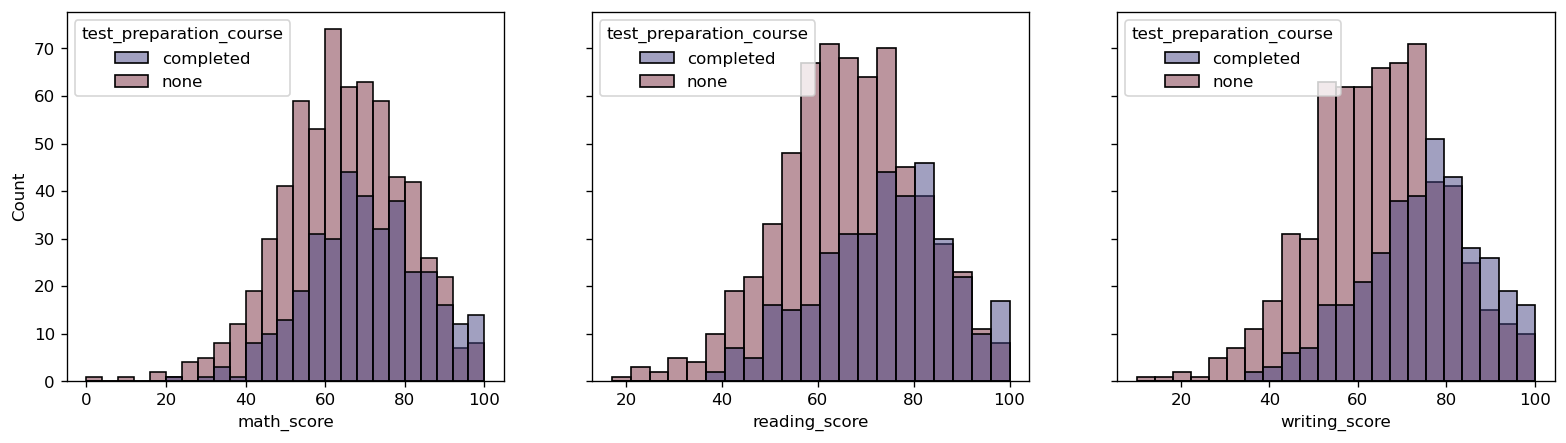

In [23]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4), sharey = True, dpi = 120)

sns.histplot(x = 'math_score', data= data, ax = ax[0], hue = 'test_preparation_course', palette = 'icefire')
sns.histplot(x = 'reading_score', data = data, ax = ax[1], hue = 'test_preparation_course', palette = 'icefire')
sns.histplot(x = 'writing_score', data = data, ax = ax[2], hue = 'test_preparation_course', palette = 'icefire')

plt.show()

Students who took the test preparation course did better in their test as seen in the chart above.

##### Race influence on test score

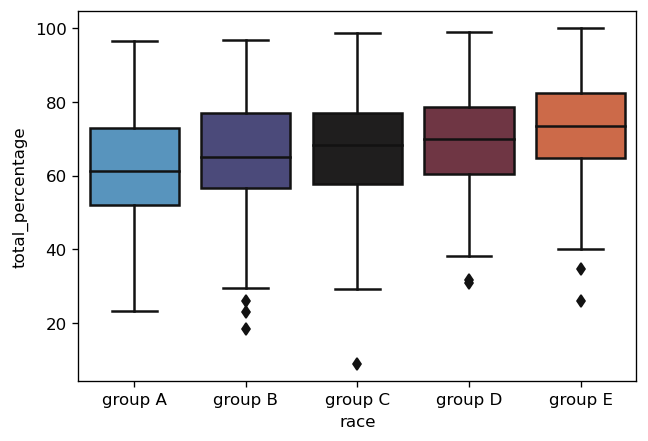

In [24]:
fig, ax = plt.subplots(figsize = (6, 4), dpi = 120)

sns.boxplot( x = 'race', data = data, y = 'total_percentage', ax = ax, palette = 'icefire')

plt.show()

From the chart above students in race group E had a sightly higher percentage in scores.

##### Gender and test scores

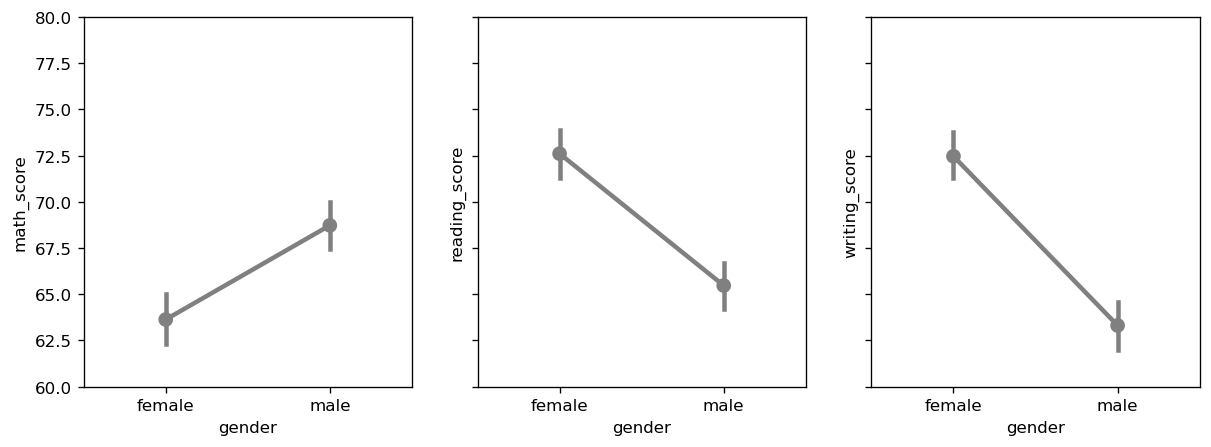

In [25]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4), sharey = True, dpi = 120)

ax[0].set(ylim = (60, 80))
sns.pointplot(y = 'math_score', data = data, ax = ax[0], x = 'gender', color = 'gray')
sns.pointplot(y = 'reading_score', data = data, ax = ax[1], x = 'gender', color = 'gray')
sns.pointplot(y = 'writing_score', data = data, ax = ax[2], x = 'gender', color = 'gray')

plt.show()

Females did better in reading and writing than in maths. Males had higher scores in maths than females

In [ ]:
#### Parental Educational Level and Students total performance 

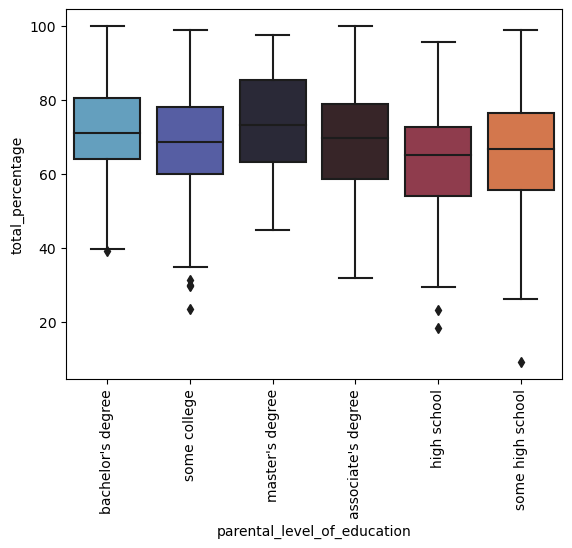

In [38]:
sns.boxplot(data = data, x = 'parental_level_of_education', y = 'total_percentage', palette = 'icefire')
plt.xticks(rotation=90)
plt.show()

From the insight drawn, parental educational level has a positive effect on the students test scores. Parents with masters degree have kids who perform better in test compared to parents with  high school certificates.

### STATISTICAL TEST 

##### Pearsons's R Correlational Test

In [26]:
corr_matrix = data[['math_score','reading_score','writing_score']].corr()
corr_matrix

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


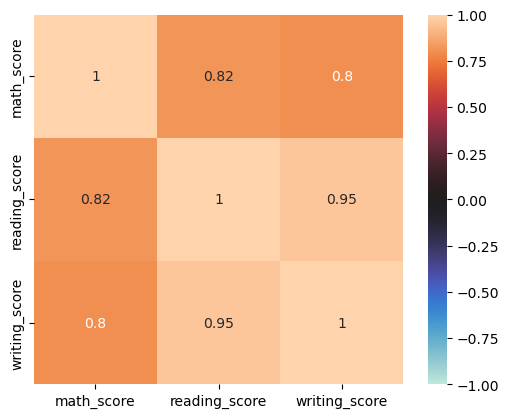

In [27]:
sns.heatmap(corr_matrix, square = True, cmap = 'icefire',annot=True, vmin = -1, vmax = 1, )

plt.show()

This is to check if having a high score in maths is positively correlated to having a high score in both reading and writing. As seen students who did well in maths did well in the other subjects too.

### Conclusion

From the data and analysis made it can be concluded that 
- Taking a course prepartion test before the actual examination leads to getting high scores in all the 3 subjects
- Race does not influece the test scores significantly
- Females tend to have higher scores in reading and writing than males. Males have higher scores in maths than females
- When a student gets a high score in maths they are more likely to also get a high score in reading and writing 

### MACHINE LEARNING
#### LINEAR REGRESSION 

In [28]:
#Creating the variables of X and y

X = data[['test_preparation_course','math_score']]
y = data['total_percentage']

In [29]:
#Transforming the parentalLOE column with Label Encoder

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

X['test_preparation_course'] = labelencoder.fit_transform(X['test_preparation_course'])

print(X)

     test_preparation_course  math_score
0                          1          72
1                          0          69
2                          1          90
3                          1          47
4                          1          76
..                       ...         ...
995                        0          88
996                        1          62
997                        0          59
998                        0          68
999                        1          77

[1000 rows x 2 columns]


C:\Users\Anita Elorm\AppData\Local\Temp\ipykernel_15040\807990805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['test_preparation_course'] = labelencoder.fit_transform(X['test_preparation_course'])


In [30]:
#Splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)

In [31]:
#Fitting Multiple Linear Reggression to the Training Set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
#Predictiing the Test Set Result

y_prediction = regressor.predict(X_test)
y_prediction

array([80.9243808 , 42.97226562, 74.17733811, 59.83987237, 61.52663305,
       93.57508587, 71.64719709, 75.02071844, 77.55085946, 70.45396998,
       89.35818418, 68.76720931, 73.33395777, 63.21339372, 77.55085946,
       78.04439302, 69.96043642, 98.28552112, 76.35763235, 78.88777336,
       72.49057743, 72.14073066, 85.98466283, 58.1531117 , 45.50240664,
       66.2370683 , 40.44212461, 74.67087167, 62.37001338, 52.24944933,
       77.55085946, 78.39423979, 32.85170157, 75.51425201, 65.39368796,
       60.68325271, 49.36946155, 85.14128249, 81.41791437, 62.37001338,
       63.21339372, 66.58691507, 40.93565818, 71.64719709, 59.83987237,
       72.49057743, 52.24944933, 62.02016661, 76.35763235, 80.9243808 ,
       78.39423979, 50.56268866, 67.43029541, 56.46635102, 76.70747912,
       95.26184654, 66.58691507, 64.05677406, 64.05677406, 60.68325271,
       53.93621001, 70.80381676, 60.68325271, 53.09282967, 46.34578697,
       67.08044863, 63.70692729, 73.33395777, 58.64664526, 81.76

In [33]:
#Calculating the Coefficients

regressor.coef_

array([-3.02367458,  0.84338034])

#### Calculating the Intercept
This is the expected mean value of the y values

In [34]:
regressor.intercept_

13.947487380609125

In [35]:
#Calculating the R squared Value

from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)

0.8448524145636875

The R squared score of 0.84 proves that the the linear Regression model is good.

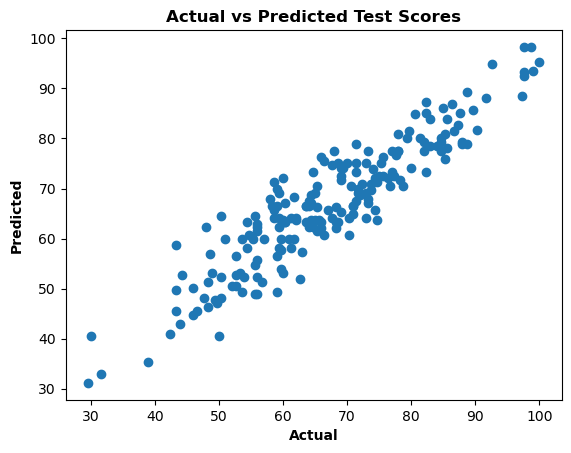

In [36]:
#Actual vs Predited Test Scores

plt.scatter(y_test, y_prediction)
plt.xlabel('Actual', fontweight='bold')
plt.ylabel('Predicted', fontweight = 'bold')
plt.title('Actual vs Predicted Test Scores', fontweight='heavy')

plt.show()

# THANK YOU!!!